**Name : Islam,M.M.Sabbir**

**ID : 18-37311-1**



In [3]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler, ReduceLROnPlateau

import os
import numpy as np
import matplotlib.pyplot as plt

os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [4]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

170500096/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [6]:
SEED = 1000
BATCH_SIZE = 256
IMG_SIZE=32;

X_train = np.array(X_train)
X_test = np.array(X_test)

X_train = X_train/ 255
X_test = X_test/ 255

In [7]:
train_gen_low_augmentation = ImageDataGenerator(
    # set range for random shear
    shear_range=0.2,
    # set range for random zoom
    zoom_range=0.3,
    horizontal_flip=True,
    # randomly flip images
    vertical_flip=False,
    validation_split=0.1,
    dtype=tf.float32
    )
    
train_gen_high_augmentation = ImageDataGenerator(
    # set input mean to 0 over the dataset
    featurewise_center=False,
    # set each sample mean to 0
    samplewise_center=False,
    # divide inputs by std of dataset
    featurewise_std_normalization=False,
    # divide each input by its std
    samplewise_std_normalization=False,
    # apply ZCA whitening
    zca_whitening=False,
    # epsilon for ZCA whitening
    zca_epsilon=1e-06,
    # randomly rotate images in the range (deg 0 to 180)
    rotation_range=60,
    # randomly shift images horizontally
    width_shift_range=0.2,
    # randomly shift images vertically
    height_shift_range=0.2,
    # set range for random shear
    shear_range=0.2,
    # set range for random zoom
    zoom_range=0.3,
    # set range for random channel shifts
    channel_shift_range=0.,
    # set mode for filling points outside the input boundaries
    fill_mode='nearest',
    # value used for fill_mode = "constant"
    cval=0.,
    # randomly flip images
    horizontal_flip=True,
    # randomly flip images
    vertical_flip=False,
    # set rescaling factor (applied before any other transformation)
    rescale=None,
    # set function that will be applied on each input
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
    # image data format, either "channels_first" or "channels_last"
    data_format=None,
    # fraction of images reserved for validation 
    
    validation_split=0.1,
    dtype=tf.float32,
)


In [8]:
t_batch_low_augmentation = train_gen_low_augmentation.flow(X_train,Y_train,batch_size = BATCH_SIZE)


t_batch_high_augmentation = train_gen_high_augmentation.flow(X_train,Y_train,batch_size = BATCH_SIZE)

In [9]:
# VGG -16 CNN Architecture

model = keras.Sequential([
    keras.Input(shape=X_train.shape[1:]),
    
    layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"),
    layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"),
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
    layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
    layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
    layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
    layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
    layers.Flatten(),
    layers.Dense(4096,activation="relu"),
    layers.Dense(4096,activation="relu"),
    layers.Dense(10, activation="softmax")
    ])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 256)         2

In [10]:
model=model
model_Low=model
model_high=model

In [11]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [12]:
model_Low.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [13]:
model_high.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

# **Without Data Augmentation**

In [14]:
h = model.fit(x=X_train, y=Y_train, epochs=20,validation_split=0.1, batch_size=256,shuffle = True)

Epoch 1/20
176/176 [==============================] - 56s 121ms/step - loss: 2.0032 - accuracy: 0.2166 - val_loss: 1.7919 - val_accuracy: 0.2896
Epoch 2/20
176/176 [==============================] - 17s 99ms/step - loss: 1.6152 - accuracy: 0.3657 - val_loss: 1.5101 - val_accuracy: 0.4142
Epoch 3/20
176/176 [==============================] - 18s 101ms/step - loss: 1.4197 - accuracy: 0.4609 - val_loss: 1.3632 - val_accuracy: 0.5086
Epoch 4/20
176/176 [==============================] - 18s 103ms/step - loss: 1.2607 - accuracy: 0.5333 - val_loss: 1.2344 - val_accuracy: 0.5424
Epoch 5/20
176/176 [==============================] - 18s 105ms/step - loss: 1.0938 - accuracy: 0.5993 - val_loss: 1.0715 - val_accuracy: 0.6082
Epoch 6/20
176/176 [==============================] - 18s 105ms/step - loss: 0.9611 - accuracy: 0.6539 - val_loss: 1.0120 - val_accuracy: 0.6320
Epoch 7/20
176/176 [==============================] - 18s 105ms/step - loss: 0.8296 - accuracy: 0.7036 - val_loss: 0.8976 - val_acc

In [ ]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 4s 10ms/step - loss: 0.9039 - accuracy: 0.7005

Test accuracy: 0.7005000114440918


# **Less Data Augmentation**

In [15]:
h_low_augmentation = model_Low.fit(t_batch_low_augmentation, 
              epochs=20,
              steps_per_epoch = X_train.shape[0] // BATCH_SIZE,
              verbose=1
             )

Epoch 1/20
195/195 [==============================] - 28s 142ms/step - loss: 0.8449 - accuracy: 0.7165
Epoch 2/20
195/195 [==============================] - 25s 128ms/step - loss: 0.7336 - accuracy: 0.7502
Epoch 3/20
195/195 [==============================] - 26s 133ms/step - loss: 0.6909 - accuracy: 0.7645
Epoch 4/20
195/195 [==============================] - 26s 133ms/step - loss: 0.6604 - accuracy: 0.7760
Epoch 5/20
195/195 [==============================] - 25s 130ms/step - loss: 0.6165 - accuracy: 0.7901
Epoch 6/20
195/195 [==============================] - 25s 128ms/step - loss: 0.5971 - accuracy: 0.7952
Epoch 7/20
195/195 [==============================] - 25s 130ms/step - loss: 0.5690 - accuracy: 0.8058
Epoch 8/20
195/195 [==============================] - 26s 133ms/step - loss: 0.5440 - accuracy: 0.8147
Epoch 9/20
195/195 [==============================] - 26s 131ms/step - loss: 0.5244 - accuracy: 0.8216
Epoch 10/20
195/195 [==============================] - 26s 133ms/step - l

In [ ]:
test_loss, test_acc = model_Low.evaluate(X_test, Y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 3s 9ms/step - loss: 0.6724 - accuracy: 0.7695

Test accuracy: 0.7695000171661377


# **High Data Augmentation**

In [16]:
h_high_augmentation = model_high.fit(t_batch_high_augmentation, 
              epochs=20,
              steps_per_epoch = X_train.shape[0] // BATCH_SIZE,
              verbose=1
             )

Epoch 1/20
195/195 [==============================] - 31s 156ms/step - loss: 13.8498 - accuracy: 0.1015
Epoch 2/20
195/195 [==============================] - 30s 154ms/step - loss: 2.3028 - accuracy: 0.0990
Epoch 3/20
195/195 [==============================] - 31s 158ms/step - loss: 2.3027 - accuracy: 0.0965
Epoch 4/20
195/195 [==============================] - 29s 150ms/step - loss: 2.3027 - accuracy: 0.0961
Epoch 5/20
195/195 [==============================] - 31s 160ms/step - loss: 2.3027 - accuracy: 0.0999
Epoch 6/20
195/195 [==============================] - 31s 157ms/step - loss: 2.3027 - accuracy: 0.0974
Epoch 7/20
195/195 [==============================] - 31s 160ms/step - loss: 2.3027 - accuracy: 0.0986
Epoch 8/20
195/195 [==============================] - 29s 150ms/step - loss: 2.3027 - accuracy: 0.0986
Epoch 9/20
195/195 [==============================] - 31s 159ms/step - loss: 2.3027 - accuracy: 0.0995
Epoch 10/20
195/195 [==============================] - 30s 152ms/step - 

In [17]:
test_loss, test_acc = model_high.evaluate(X_test, Y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 4s 10ms/step - loss: 2.3059 - accuracy: 0.1000

Test accuracy: 0.10000000149011612


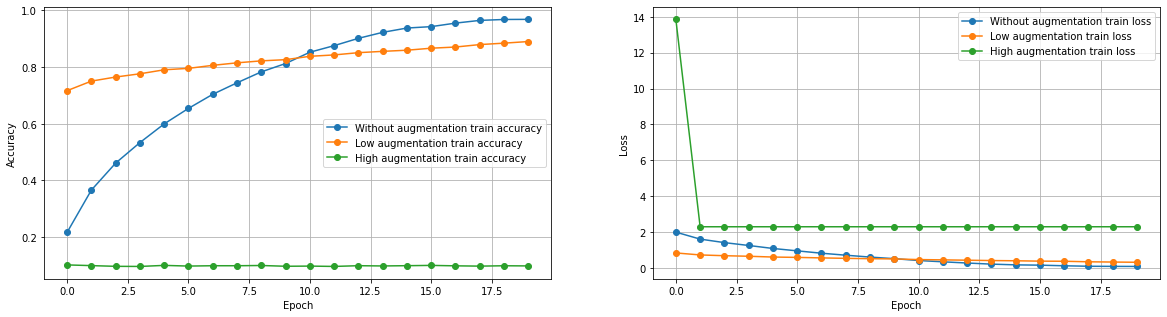

In [24]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='Without augmentation train accuracy')
plt.plot(h_low_augmentation.history['accuracy'], 'o-', label='Low augmentation train accuracy')
plt.plot(h_high_augmentation.history['accuracy'], 'o-', label='High augmentation train accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='center right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='Without augmentation train loss')
plt.plot(h_low_augmentation.history['loss'], 'o-', label='Low augmentation train loss')
plt.plot(h_high_augmentation.history['loss'], 'o-', label='High augmentation train loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

##**Conclusion**

Without data augmentation test accuracy is less than the test accuracy of less data augmentation.High data augmentation test accuracy is very low.So,less data augmentation method has highest test accuracy than other methods.Also the training needs more memory without the data generator. Data generator is used with flow method requires significantly less memory to train.

